In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit import cost
from iminuit.cost import LeastSquares
from scipy import stats
from scipy.special import gamma

r = np.random

## Gillespie and euler simulation comparison

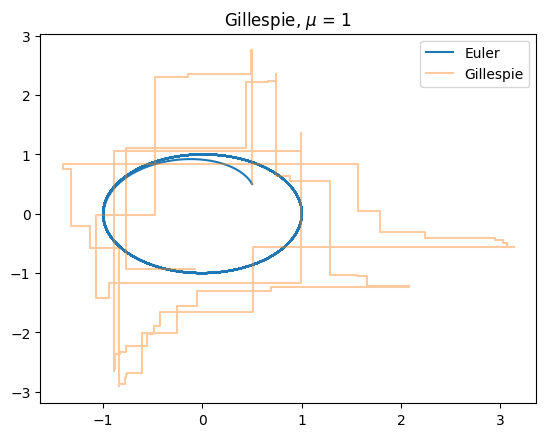

In [ ]:
" Euler below"
def xfunc(x,y,mu):
    return (mu-x**2-y**2)*x - y
def yfunc(x,y,mu):
    return (mu-x**2-y**2)*y + x
mu = 1
x0 = 0.5
y0 = 0.5
xlisteuler = [x0]
ylisteuler = [y0]
t = 0
dte = 0.01
Tmax = 50
while t < 100:
    xlisteuler.append(xlisteuler[-1] + dte*xfunc(xlisteuler[-1],ylisteuler[-1],mu))
    ylisteuler.append(ylisteuler[-1] + dte*yfunc(xlisteuler[-1],ylisteuler[-1],mu))
    t += dte

"Gillespie below"
tgillespie = 0
xlistgillespie = [x0]
ylistgillespie = [y0]
tlist = [0]
def happening(mu,x,y):
    rate1x = mu*x
    rate1y = mu*y
    rate2x = x**3
    rate2y = y**3
    rate3x = y**2*x
    rate3y = x**2*y
    rate4x = y
    rate4y = x
    xhap = [rate1x,rate2x,rate3x,rate4x]
    signx = [1,-1,-1,-1]
    yhap = [rate1y,rate2y,rate3y,rate4y]
    signy = [1,-1,-1,1]
    return xhap,yhap,signx,signy
while tgillespie < Tmax:
    x, y = xlistgillespie[-1], ylistgillespie[-1]
    dx = xfunc(x,y,mu)
    dy = yfunc(x,y,mu)
    
    R = np.array([abs(dx),abs(dy)])

    RT = np.sum(R)
    if RT == 0:
        break
    dt = r.exponential(1/RT)
    tgillespie += dt
    tlist.append(tgillespie)
    U = r.uniform(0,RT)
    if U < R[0]:
        xlistgillespie.append(xlistgillespie[-1] + np.sign(dx)*dt)
        ylistgillespie.append(ylistgillespie[-1])
    else:
        xlistgillespie.append(xlistgillespie[-1])
        ylistgillespie.append(ylistgillespie[-1] + np.sign(dy)*dt)
    
plt.plot(xlisteuler,ylisteuler,label='Euler')
plt.plot(xlistgillespie,ylistgillespie,alpha = 0.4,label='Gillespie')
plt.title(f'Gillespie, $\\mu$ = {mu}')
plt.legend(loc = 'upper right')
plt.show()


In [ ]:
#Forsøg med alle rates
" Euler below"
def xfunc(x,y,mu):
    return (mu-x**2-y**2)*x - y
def yfunc(x,y,mu):
    return (mu-x**2-y**2)*y + x
mu = 1
x0 = 0.5
y0 = 0.5
xlisteuler = [x0]
ylisteuler = [y0]
t = 0
dte = 0.01
Tmax = 10
while t < 100:
    xlisteuler.append(xlisteuler[-1] + dte*xfunc(xlisteuler[-1],ylisteuler[-1],mu))
    ylisteuler.append(ylisteuler[-1] + dte*yfunc(xlisteuler[-1],ylisteuler[-1],mu))
    t += dte

"Gillespie below"
tgillespie = 0
xlistgillespie = [x0]
ylistgillespie = [y0]
tlist = [0]
def happening(mu,x,y):
    rate1x = mu*x
    rate1y = mu*y
    rate2x = -x**3
    rate2y = -y**3
    rate3x = -y**2*x
    rate3y = -x**2*y
    rate4x = -y
    rate4y = x
    xhap = np.array([rate1x,rate2x,rate3x,rate4x])
    yhap = np.array([rate1y,rate2y,rate3y,rate4y])
    return xhap,yhap
while tgillespie < Tmax:
    x, y = xlistgillespie[-1], ylistgillespie[-1]
    dx, dy = happening(mu, x, y)
    rates = np.concatenate((abs(dx), abs(dy)))
    RT = np.sum(rates)
    if RT == 0:
        break
    dt = r.exponential(1/RT)
    tgillespie += dt
    tlist.append(tgillespie)
    U = r.uniform(0,RT)
    index = 0
    print(np.sign(dx),np.sign(dy))
    if U < sum(abs(dx)):
        while U < sum(abs(dx[:index])):
            index += 1
        xlistgillespie.append(xlistgillespie[-1] + np.sign(dx[index])*dt)
        ylistgillespie.append(ylistgillespie[-1])
    else:
        while U <sum(abs(dy[:index])):
            index += 1
        xlistgillespie.append(xlistgillespie[-1])
        ylistgillespie.append(ylistgillespie[-1] + np.sign(dy[index])*dt)
plt.plot(xlisteuler,ylisteuler,label='Euler')
plt.plot(xlistgillespie,ylistgillespie,alpha = 0.4,label='Gillespie')
plt.title(f'Gillespie, $\\mu$ = {mu}')
plt.legend(loc = 'upper right')
plt.show()


[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -1.  1.]
[ 1. -1. -1. -1.] [ 1. -1. -

## Fourier transform stuff

In [ ]:
x_array = np.array(xlistgillespie)
y_array = np.array(ylistgillespie)
time_diffs = np.diff(tlist)
dt_avg = np.mean(time_diffs)  # Average dt

freqs = np.fft.fftfreq(len(x_array), d=dt_avg)
fft_x = np.fft.fft(x_array)
fft_y = np.fft.fft(y_array)

power_x = np.abs(fft_x) ** 2 # power is just the square of the absolute value of the fourier transform
power_y = np.abs(fft_y) ** 2 # power is just the square of the absolute value of the fourier transform

# Plot power spectrum
plt.figure(figsize=(10, 5))
plt.plot(freqs[:len(freqs)//2], power_x[:len(freqs)//2], label="Power Spectrum of x", alpha=0.7) #positive values
plt.plot(freqs[:len(freqs)//2], power_y[:len(freqs)//2], label="Power Spectrum of y", alpha=0.7) # positive values
plt.xlim(0,0.05)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title(f"Fourier Transform of Gillespie Simulation, mu = {mu}")
plt.legend()
plt.show()
plt.hist(abs(x_array),bins=100,density = True,label='Histogram of x coordinates')
plt.hist(abs(y_array),bins=100,alpha = 0.4,density = True,label='Histogram of y coordinates')
plt.axvline(mu**0.5,color='g',label=f'True radius of limit cycle {mu**0.5:.2f}')
plt.legend()
plt.show()
plt.hist(np.sqrt(x_array**2+y_array**2),bins=100,density = True,label='Histogram of radii')
plt.axvline(mu**0.5,color='g',label=f'True radius of limit cycle {mu**0.5:.2f}')

plt.legend()
plt.show()

In [ ]:
# Apply a frequency filter (keep only frequencies below f_max)
f_maxX = 0.03  # Choose a frequency cutoff based on the spectrum
f_minX = 0.008
fmaxY = 0.03
fminY = 0.008
freq_maskx = (np.abs(freqs) < f_maxX) & (np.abs(freqs) > f_minX)
freq_masky = (np.abs(freqs) < f_maxX) & (np.abs(freqs) > f_minX)

filtered_fft_x = fft_x * freq_maskx
filtered_fft_y = fft_y * freq_masky

# Perform the inverse FFT to get the filtered signal
filtered_x = np.fft.ifft(filtered_fft_x)
filtered_y = np.fft.ifft(filtered_fft_y)

plt.plot(filtered_x.real,filtered_y.real,alpha = 0.4) # Filtered signal, so most noise removed
circle1 = plt.Circle((0, 0), mu**0.5, color='r',fill=False)
plt.gca().add_artist(circle1)
plt.show()


In [ ]:
plt.hist(abs(filtered_x.real),bins=250,density = True,label='Histogram of x coordinates')
plt.hist(abs(filtered_y.real),bins=250,alpha = 0.4,density = True,label='Histogram of y coordinates')
plt.legend()
plt.show()
plt.hist(np.sqrt(filtered_x.real**2 + filtered_y.real**2),bins=250,density = True,label='Histogram of r coordinates')
plt.axvline(mu**0.5,color='g',label=f'True radius of limit cycle {mu**0.5:.2f}')
plt.show()

In [ ]:
# Define generalized normal distribution
def generalized_normal(x, alpha, beta,A):
    return A*(beta / (2 * alpha * gamma(1 / beta))) * np.exp(-((np.abs(x) / alpha) ** beta))

# Fit histogram data
counts, bins = np.histogram(filtered_x.real, bins=100, density=True)
bincenters = 0.5 * (bins[1:] + bins[:-1])
countmask = counts > 0
bincenters = bincenters[countmask]
counts = counts[countmask]

# Define Least Squares
gen_norm_chi2 = LeastSquares(bincenters, counts, np.sqrt(counts), generalized_normal)

# Initialize Minuit
m = Minuit(gen_norm_chi2, alpha=0.5, beta=2,A = 1)
m.limits['beta'] = (1, 10)  # Allow beta to adjust peak shape

# Perform fit
m.migrad()
print(m.values)
print(m.errors)
pval = stats.chi2.sf(m.fval, 2)

# Plot results
plt.hist(filtered_x.real, bins=100, density=True, alpha=0.5, label="Histogram")
plt.plot(bincenters, generalized_normal(bincenters, *m.values), label="Generalized Normal Fit", color="red")
plt.legend()
plt.title(f"Generalized Normal Fit of x coordinates, p-value = {pval:.2f}")
plt.show()


In [ ]:
# Define generalized normal distribution
def generalized_normal(x, alpha, beta,A):
    return A*(beta / (2 * alpha * gamma(1 / beta))) * np.exp(-((np.abs(x) / alpha) ** beta))

# Fit histogram data
counts, bins = np.histogram(filtered_y.real, bins=100, density=True)
bincenters = 0.5 * (bins[1:] + bins[:-1])
countmask = counts > 0
bincenters = bincenters[countmask]
counts = counts[countmask]

# Define Least Squares
gen_norm_chi2 = LeastSquares(bincenters, counts, np.sqrt(counts), generalized_normal)

# Initialize Minuit
m = Minuit(gen_norm_chi2, alpha=0.5, beta=2,A = 1)
m.limits['beta'] = (1, 10)  # Allow beta to adjust peak shape

# Perform fit
m.migrad()
print(m.values)
print(m.errors)
pval = stats.chi2.sf(m.fval, 2)

# Plot results
plt.hist(filtered_y.real, bins=100, density=True, alpha=0.5, label="Histogram")
plt.plot(bincenters, generalized_normal(bincenters, *m.values), label="Generalized Normal Fit", color="red")
plt.legend()
plt.title(f"Generalized Normal Fit of x coordinates, p-value = {pval:.2f}")
plt.show()


## Smoothening

In [ ]:
from scipy.ndimage import gaussian_filter1d
xcounts, xbins = np.histogram(abs(x_array),bins=int(np.sqrt(len(x_array))))
#ycounts, ybins = np.histogram(abs(y_array),bins=500)
xbincenters = 0.5*(xbins[1:]+xbins[:-1])
#ybincenters = 0.5*(ybins[1:]+ybins[:-1])
# Apply Gaussian smoothing to the counts (xcounts and ycounts)
smoothed_xcounts = gaussian_filter1d(xcounts, sigma=4)  # sigma controls the smoothness
#smoothed_ycounts = gaussian_filter1d(ycounts, sigma=5)

# Plot the smoothed histograms
plt.plot(xbincenters, smoothed_xcounts, label='Smoothed x histogram')
print(f'Peak of smoothed x histogram: {xbincenters[np.argmax(smoothed_xcounts)]:.2f}')
print(f'peak of unsmoothed x histogram: {xbincenters[np.argmax(xcounts)]:.2f}')
print(f'True radius of limit cycle: {mu**0.5:.2f}')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Smoothed Count')
plt.show()
